In [78]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the API key.
from config import weather_api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [79]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90.000, 90.000, size = 1500)
lngs = np.random.uniform(-180.000, 180.000, size= 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [80]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-30.384364433629983, -175.7589599308655),
 (29.026014671895027, -56.69803157336678),
 (-20.40304157880881, -57.26355258599932),
 (-44.28362705799263, 26.693924337407537),
 (-2.691650224690008, -128.69352293264004),
 (-8.827285613121646, -42.3040444863982),
 (-69.42986861873705, -151.48864819440365),
 (-80.55472238649656, -159.92465115649702),
 (-71.5730816839838, -98.68030903440325),
 (-9.15675796616243, 126.1242030388666),
 (-55.90343503789679, 141.93159582104676),
 (82.3256368481066, -112.15572816320403),
 (78.73506859505383, -89.33411683949224),
 (-30.958731907831776, 4.1350527044676255),
 (88.07345250809593, 115.07617966163644),
 (56.362083176746324, 142.2763878912944),
 (-6.508477887209352, -79.16370462641252),
 (-74.79639929596937, -71.51768846353347),
 (-88.92916902356629, 162.76805810223442),
 (-35.20040867508126, 31.86642056557031),
 (41.702209933369545, -52.26630989555265),
 (12.947557019651853, -1.7502335718222355),
 (-9.742000143579148, 130.22703169243238),
 (25.336888267

In [81]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [82]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [83]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [84]:
cities

['vaini',
 'saint george',
 'fuerte olimpo',
 'port elizabeth',
 'atuona',
 'sao raimundo nonato',
 'mataura',
 'punta arenas',
 'atambua',
 'new norfolk',
 'yellowknife',
 'qaanaaq',
 'luderitz',
 'saskylakh',
 'okha',
 'chongoyape',
 'ushuaia',
 'bluff',
 'umzimvubu',
 'torbay',
 'kongoussi',
 'nguiu',
 'mangrol',
 'puerto ayora',
 'grand river south east',
 'albany',
 'safaqis',
 'kloulklubed',
 'san-pedro',
 'husavik',
 'kavaratti',
 'cape town',
 'aklavik',
 'hobart',
 'oppdal',
 'irituia',
 'esperance',
 'samusu',
 'khatanga',
 'general pico',
 'gravdal',
 'alice springs',
 'robertsport',
 'bulungu',
 'east london',
 'hermanus',
 'dombarovskiy',
 'kununurra',
 'rikitea',
 'barrow',
 'scarborough',
 'walvis bay',
 'tsihombe',
 'avarua',
 'butaritari',
 'malakal',
 'thompson',
 'shenjiamen',
 'morgan city',
 'westerland',
 'honiara',
 'adrar',
 'zabol',
 'nelson bay',
 'ostrovnoy',
 'labuhan',
 'zaozerne',
 'bababe',
 'merauke',
 'busselton',
 'barentsburg',
 'slivilesti',
 'guerre

In [85]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [86]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | saint george
Processing Record 3 of Set 1 | fuerte olimpo
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | sao raimundo nonato
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | atambua
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | luderitz
Processing Record 14 of Set 1 | saskylakh
Processing Record 15 of Set 1 | okha
Processing Record 16 of Set 1 | chongoyape
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 20 of Set 1 | torbay
Processing Record 21 of Set 1 | kongoussi
Processing Record 22 of Set 1 | nguiu
City not found. Skipping...
Processing Record 23 of Set 1 |

Processing Record 38 of Set 4 | kamaishi
Processing Record 39 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 40 of Set 4 | lewistown
Processing Record 41 of Set 4 | bezhta
Processing Record 42 of Set 4 | dongying
Processing Record 43 of Set 4 | amga
Processing Record 44 of Set 4 | karaton
Processing Record 45 of Set 4 | rawson
Processing Record 46 of Set 4 | bredasdorp
Processing Record 47 of Set 4 | pangai
Processing Record 48 of Set 4 | acapulco
Processing Record 49 of Set 4 | nishihara
Processing Record 50 of Set 4 | kodiak
Processing Record 1 of Set 5 | geraldton
Processing Record 2 of Set 5 | mikhaylovka
Processing Record 3 of Set 5 | marsa matruh
Processing Record 4 of Set 5 | caarapo
Processing Record 5 of Set 5 | touros
Processing Record 6 of Set 5 | yar-sale
Processing Record 7 of Set 5 | pafos
Processing Record 8 of Set 5 | vila velha
Processing Record 9 of Set 5 | xichang
Processing Record 10 of Set 5 | sibolga
Processing Record 11 of Set 5 | urucara
P

Processing Record 25 of Set 8 | karauzyak
City not found. Skipping...
Processing Record 26 of Set 8 | klaksvik
Processing Record 27 of Set 8 | mayya
Processing Record 28 of Set 8 | fairfield
Processing Record 29 of Set 8 | kisangani
Processing Record 30 of Set 8 | cabo san lucas
Processing Record 31 of Set 8 | thaba-tseka
Processing Record 32 of Set 8 | beringovskiy
Processing Record 33 of Set 8 | fort frances
Processing Record 34 of Set 8 | ahipara
Processing Record 35 of Set 8 | sistranda
Processing Record 36 of Set 8 | netolice
Processing Record 37 of Set 8 | fort nelson
Processing Record 38 of Set 8 | toktogul
Processing Record 39 of Set 8 | srednekolymsk
Processing Record 40 of Set 8 | ust-kuyga
Processing Record 41 of Set 8 | panjwin
City not found. Skipping...
Processing Record 42 of Set 8 | hovd
Processing Record 43 of Set 8 | nizhniy tsasuchey
Processing Record 44 of Set 8 | igarka
Processing Record 45 of Set 8 | canto do buriti
Processing Record 46 of Set 8 | itapua poty
City

Processing Record 14 of Set 12 | solnechnyy
Processing Record 15 of Set 12 | veere
Processing Record 16 of Set 12 | victoria
Processing Record 17 of Set 12 | tilichiki
Processing Record 18 of Set 12 | gombe
Processing Record 19 of Set 12 | naron
Processing Record 20 of Set 12 | saint anthony
Processing Record 21 of Set 12 | abnub
Processing Record 22 of Set 12 | bilibino
Processing Record 23 of Set 12 | marawi
Processing Record 24 of Set 12 | sambava
Processing Record 25 of Set 12 | burkburnett
Processing Record 26 of Set 12 | mogochin
City not found. Skipping...
Processing Record 27 of Set 12 | halalo
City not found. Skipping...
Processing Record 28 of Set 12 | mogadishu
Processing Record 29 of Set 12 | kutum
Processing Record 30 of Set 12 | saint-francois
Processing Record 31 of Set 12 | two hills
Processing Record 32 of Set 12 | talara
Processing Record 33 of Set 12 | amderma
City not found. Skipping...
Processing Record 34 of Set 12 | putina
Processing Record 35 of Set 12 | road to

In [101]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,80.20,83,53,16.84,TO,2022-02-09 22:55:40
1,Saint George,37.1041,-113.5841,70.27,18,0,10.00,US,2022-02-09 22:51:01
2,Fuerte Olimpo,-21.0415,-57.8738,83.03,22,5,4.14,PY,2022-02-09 22:55:41
3,Port Elizabeth,-33.9180,25.5701,62.89,88,0,5.75,ZA,2022-02-09 22:51:38
4,Atuona,-9.8000,-139.0333,78.64,77,20,17.63,PF,2022-02-09 22:55:43
5,Sao Raimundo Nonato,-9.0153,-42.6994,79.14,40,50,3.71,BR,2022-02-09 22:55:44
6,Mataura,-46.1927,168.8643,72.48,76,92,2.15,NZ,2022-02-09 22:55:45
7,Punta Arenas,-53.1500,-70.9167,51.91,46,75,28.77,CL,2022-02-09 22:52:12
8,Atambua,-9.1061,124.8925,75.90,87,100,1.52,ID,2022-02-09 22:55:46
9,New Norfolk,-42.7826,147.0587,70.92,41,48,6.31,AU,2022-02-09 22:55:47


In [102]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [103]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

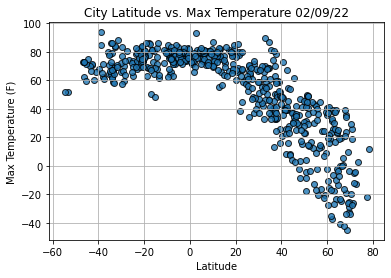

In [104]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

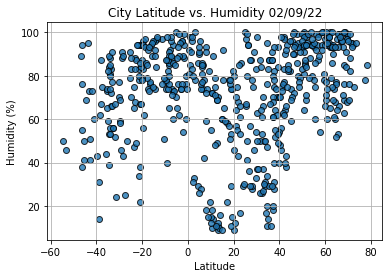

In [105]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

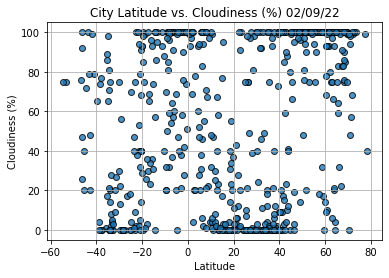

In [106]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

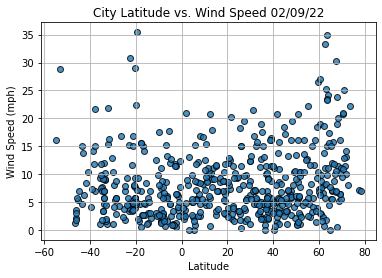

In [107]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [108]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [109]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1644449750.3037546

In [110]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [111]:
index13 = city_data_df.loc[13]
index13

City                    Saskylakh
Lat                       71.9167
Lng                      114.0833
Max Temp                    -5.28
Humidity                       95
Cloudiness                     68
Wind Speed                   9.95
Country                        RU
Date          2022-02-09 22:55:51
Name: 13, dtype: object

In [112]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

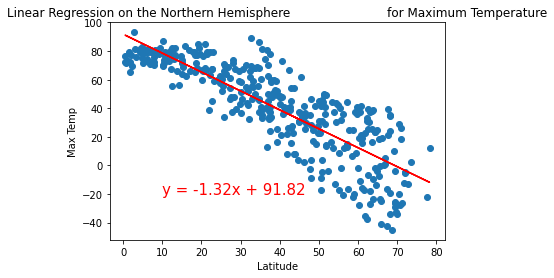

In [113]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-20))

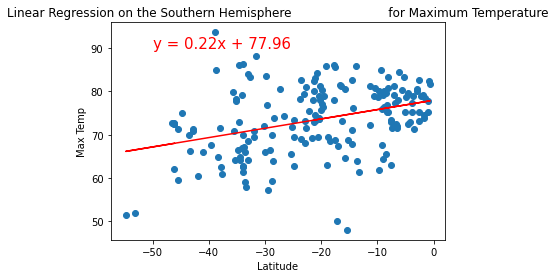

In [116]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

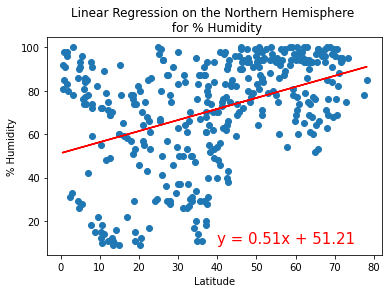

In [127]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

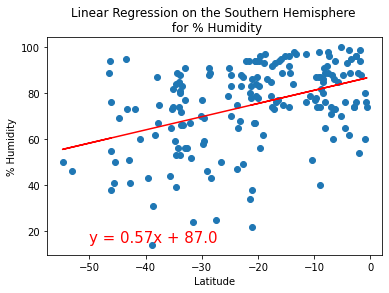

In [126]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

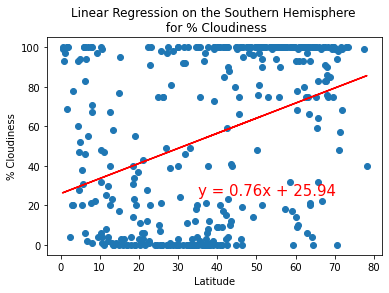

In [137]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(35,25))

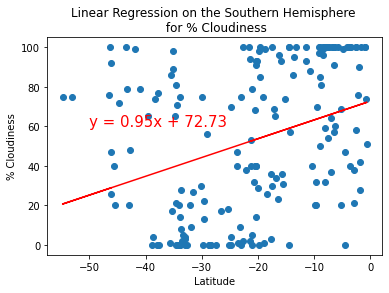

In [131]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

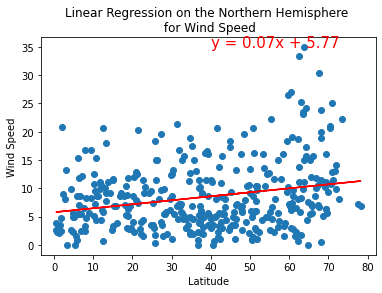

In [138]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

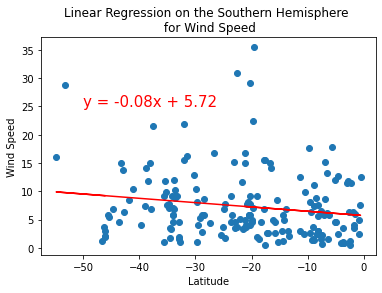

In [142]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))